# Logistic Regression Model

## Train for 20 epochs

Observe the loss decreasing while training.

In [4]:
!python3 LogisticRegression.py --max_epochs=20

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name | Type       | Params | In sizes    | Out sizes
--------------------------------------------------------------
0 | seq  | Sequential | 7 K    | [1, 1, 784] | [1, 10]  
Epoch 0:  83%|█████████▏ | 782/939 [00:08<00:01, 88.13it/s, loss=0.676, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 0:  93%|██████████▏| 873/939 [00:11<00:00, 77.60it/s, loss=0.676, v_num=0]
Epoch 0: 100%|█| 939/939 [00:11<00:00, 79.83it/s, loss=0.676, v_num=0, val_loss=
Epoch 1:  83%|▊| 782/939 [00:08<00:01, 87.24it/s, loss=0.533, v_num=0, val_loss=
Validating: 0it [00:00, ?it/s]
Epoch 1:  85%|▊| 798/939 [00:11<00:01, 72.19it/s, loss=0.533, v_num=0, val_loss=
Epoch 1:  91%|▉| 855/939 [00:11<00:01, 76.56it/s, loss=0.533, v_num=0, val_loss=
Epoch 1: 100%|█| 939/939 [00:11<00:00, 80.04it/s, loss=0.533, v_num=0, val_loss=
Epoch 2:  83%|▊| 782/939 [00:09<00:01, 84.51it/s, loss=0.548, v_num=0, val_loss=
Validating: 0it [00:00, ?it/s]
Epoch 

## Inspect logs
⚠️ Make sure to **Stop** the cell execution after observing the logs

This simple logistic regression achieves **90% accuracy** on the MNIST test data set.

In [5]:
!tensorboard --logdir=./lightning_logs

W0909 14:38:13.390138 123145347186688 plugin_event_accumulator.py:321] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0909 14:38:13.393561 123145347186688 plugin_event_accumulator.py:359] Found more than one "run metadata" event with tag step1. Overwriting it with the newest event.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


## Load trained model
Checkpoints are saved incrementally for each training session under `./lightning_logs/version_X`.

In [9]:
__import__("sys").path.append("..")
import utils

from LogisticRegression import LogisticRegression


model = utils.load_trained_model_for_evaluation(LogisticRegression, 0)
print(model)

LogisticRegression(
  (seq): Sequential(
    (0): Flatten()
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)


## Predict MNIST labels

Original label:  0 Predicted label:  0


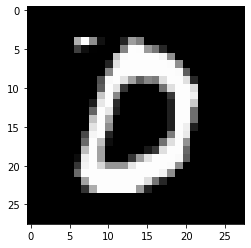

Original label:  3 Predicted label:  3


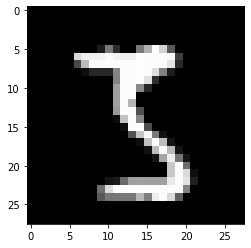

Original label:  1 Predicted label:  1


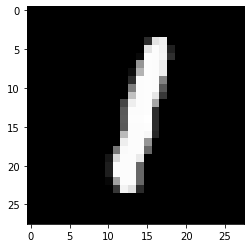

Original label:  7 Predicted label:  7


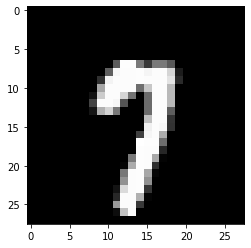

Original label:  9 Predicted label:  9


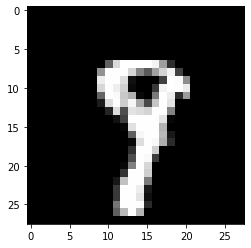

Original label:  7 Predicted label:  7


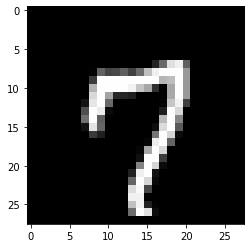

Original label:  8 Predicted label:  8


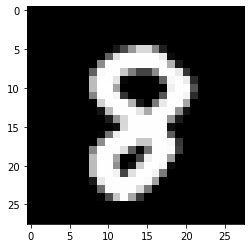

Original label:  8 Predicted label:  8


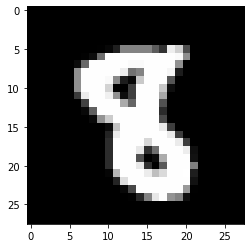

Original label:  8 Predicted label:  8


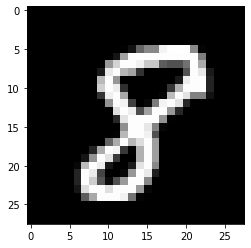

Original label:  8 Predicted label:  8


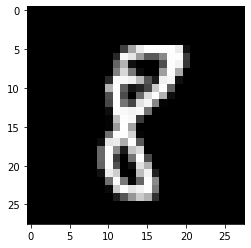

In [34]:
import torch
import random

test_len = model.mnist_test.data.shape[0]

for i in range(0, 10):
    orig_img, orig_label = model.mnist_test[random.randint(0, test_len)]
    orig_img = orig_img.view(1, 1, 28, 28)
    classes = model(orig_img)
    predicted_label = torch.max(classes.data, 1).indices.item()

    print("Original label: ", orig_label, "Predicted label: ", predicted_label)
    utils.plot_images([orig_img.view(28, 28)])